In [1]:
#I'm really sad all progress got left. Some of the stuff I used from ChatGPT so look at that. Basically I got weighted 
# averages/total uncertainties for weighted average. Oh yeah I had code which segemented by sample 'E50' etc

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('/home/luke/data/XRF/20240228.csv')

In [25]:
element_columns = ['Ag', 'Al', 'As', 'Au', 'Ba', 'Bi', 'Ca', 'Cd', 'Cl', 'Co', 'Cr', 'Cu', 'Fe', 'Hf', 'Hg', 'K', 'Mg',
                   'Mn', 'Mo', 'Nb', 'Ni', 'P', 'Pb', 'Pd', 'Rb', 'Re', 'S', 'Sb', 'Se', 'Si', 'Sn', 'Sr', 'Ta', 'Th',
                   'Ti', 'U', 'V', 'W', 'Y', 'Zn', 'Zr']

uncertainty_columns = [f"{element} 2-Sigma" for element in element_columns]



In [26]:
def replace_non_float(val):
    try:
        return float(val)
    except ValueError:
        return np.finfo(float).eps

In [32]:
E50 = df[df['Sample']=='50'].applymap(replace_non_float)
E50[uncertainty_columns] = E50[uncertainty_columns].replace(0, np.finfo(float).eps)
E57 = df[df['Sample']=='57'].applymap(replace_non_float)
E57[uncertainty_columns] = E57[uncertainty_columns].replace(0, np.finfo(float).eps)
E59 = df[df['Sample']=='59'].applymap(replace_non_float)
E59[uncertainty_columns] = E59[uncertainty_columns].replace(0, np.finfo(float).eps)


/tmp/ipykernel_2146506/1150719008.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  E50 = df[df['Sample']=='50'].applymap(replace_non_float)
/tmp/ipykernel_2146506/1150719008.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  E57 = df[df['Sample']=='57'].applymap(replace_non_float)
/tmp/ipykernel_2146506/1150719008.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  E59 = df[df['Sample']=='59'].applymap(replace_non_float)


In [33]:
def WeightedAvgRow(df, element_columns):

    uncertainty_columns = [f"{element} 2-Sigma" for element in element_columns]

    weighted_avg_row = {}

    for x in range(len(element_columns)):

        weighted_avg_row[element_columns[x]] = (np.sum(df[element_columns[x]]/(df[uncertainty_columns[x]]**2) )) / (np.sum(1/df[uncertainty_columns[x]]**2))
        weighted_avg_row[uncertainty_columns[x]] = np.sqrt(1/np.sum(1/df[uncertainty_columns[x]]**2))

    weighted_avg_row = pd.DataFrame([weighted_avg_row])

    df = pd.concat([df, weighted_avg_row], ignore_index=True)

    return df

E50_new = WeightedAvgRow(E50, element_columns)
E50_new

,Reading No,Reading Type,Duration,Main,Low,High,Light,Time,User,Sigma Value,...,V,V 2-Sigma,W,W 2-Sigma,Y,Y 2-Sigma,Zn,Zn 2-Sigma,Zr,Zr 2-Sigma
0,66.0,2.220446e-16,140.35,0.0,29.00,29.06,28.86,2.220446e-16,2.220446e-16,2.0,...,56.778700,11.609100,2.220446e-16,2.220446e-16,15.041200,0.872200,82.781000,4.329000,183.082200,1.866300
1,67.0,2.220446e-16,141.27,0.0,28.71,29.34,29.21,2.220446e-16,2.220446e-16,2.0,...,57.516000,12.700900,2.220446e-16,2.220446e-16,14.660800,0.859900,74.472400,4.161800,181.396900,1.850200
2,68.0,2.220446e-16,141.10,0.0,29.12,29.33,29.57,2.220446e-16,2.220446e-16,2.0,...,62.357500,12.137600,2.220446e-16,2.220446e-16,17.054400,0.876500,75.651500,4.243800,174.106500,1.829000
3,69.0,2.220446e-16,140.89,0.0,29.46,29.70,28.53,2.220446e-16,2.220446e-16,2.0,...,63.490300,12.112700,2.220446e-16,2.220446e-16,17.244700,0.875200,79.875700,4.274700,180.333500,1.835800
4,73.0,2.220446e-16,141.09,0.0,29.97,29.58,29.34,2.220446e-16,2.220446e-16,2.0,...,49.920900,11.331300,2.220446e-16,2.220446e-16,14.412100,0.839300,87.302000,4.371900,172.351600,1.798800
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.771916,5.344379,2.220446e-16,9.930137e-17,15.652177,0.386516,79.864952,1.911569,178.157868,0.820905


In [51]:
E50[uncertainty].iloc[-1]

Ag 2-Sigma    1.331600e+00
Al 2-Sigma    5.740826e+02
As 2-Sigma    4.260600e+00
Au 2-Sigma    4.734200e+00
Ba 2-Sigma    2.543840e+01
Bi 2-Sigma    2.771100e+00
Ca 2-Sigma    1.134624e+02
Cd 2-Sigma    2.033300e+00
Cl 2-Sigma    3.042410e+01
Co 2-Sigma    7.973470e+01
Cr 2-Sigma    6.799300e+00
Cu 2-Sigma    6.892600e+00
Fe 2-Sigma    1.629130e+02
Hf 2-Sigma    2.220446e-16
Hg 2-Sigma    3.264900e+00
K 2-Sigma     1.496873e+02
Mg 2-Sigma    1.950497e+03
Mn 2-Sigma    4.555510e+01
Mo 2-Sigma    2.044500e+00
Nb 2-Sigma    8.180000e-01
Ni 2-Sigma    7.672100e+00
P 2-Sigma     9.195680e+01
Pb 2-Sigma    2.550900e+00
Pd 2-Sigma    1.226100e+00
Rb 2-Sigma    1.535800e+00
Re 2-Sigma    2.220446e-16
S 2-Sigma     3.470040e+01
Sb 2-Sigma    7.993100e+00
Se 2-Sigma    1.699000e+00
Si 2-Sigma    5.269880e+02
Sn 2-Sigma    2.898500e+00
Sr 2-Sigma    1.219900e+00
Ta 2-Sigma    2.220446e-16
Th 2-Sigma    1.480800e+00
Ti 2-Sigma    3.996770e+01
U 2-Sigma     1.585600e+00
V 2-Sigma     1.133130e+01
W

In [139]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Sample data with error
elements = ['As', 'Fe', 'Mn', 'S']

def PlotEls(Dataframes, elements, no):
    
    E50, E57, E59 = Dataframes

    uncertainty = [f"{element} 2-Sigma" for element in elements]

    # Create grouped bar chart
    x = np.arange(len(elements))
    width = 0.25
    fig, ax = plt.subplots(figsize=(10, 6))

    # Bars for contaminated data with error bars
    bar50 = ax.bar(x - width/2, E50[elements].iloc[-1], width, yerr=E50[uncertainty].iloc[-1], capsize = 4 , label='Contaminated', color = '#d60404', edgecolor='black')

    # Bars for non-contaminated data with error bars
    bar57 = ax.bar(x + width/2, E57[elements].iloc[-1]+1, width, yerr=E57[uncertainty].iloc[-1], capsize = 4, label='Non-Contaminated', color = '#6dd604', edgecolor='black')

    # Bars for additional data with error bars
    bar59 = ax.bar(x + 3*width/2, E59[elements].iloc[-1]+1, width, yerr=E59[uncertainty].iloc[-1], capsize = 4, color = '#6dd604', edgecolor='black')

    boxplot_x = np.arange(len(elements))
    boxplot_width = 0.25
    boxplot_x_offset = 2*width + boxplot_width/2
    boxplot_x_positions = [x + boxplot_x_offset for x in range(len(elements))]
    #boxprops = dict(color='blue', linestyle='-')  # Customize box color and line style
    medianprops = dict(color='#FFCE00', linewidth=2)  # Customize median line color and width
    boxprops = dict(facecolor='#00CAFF', edgecolor='black')
    ax.boxplot(df[elements], positions=boxplot_x_positions, widths=boxplot_width,
           boxprops=boxprops,
           medianprops=medianprops,
           patch_artist=True)

    # Add labels and title
    ax.set_xlabel('Elements')
    ax.set_ylabel('Abundance / ppm')
    #ax.set_title('Elemental Abundances in Contaminated vs. Non-Contaminated Samples')
    ax.set_xticks(x)
    ax.set_xticklabels(elements)
    ax.legend()

    # Set y-axis to logarithmic scale
    ax.set_yscale('log')
    ax.set_ylim(10**0, 10**5)

    plt.savefig(f'Prelim_Plot{no}.pdf')
    plt.show()


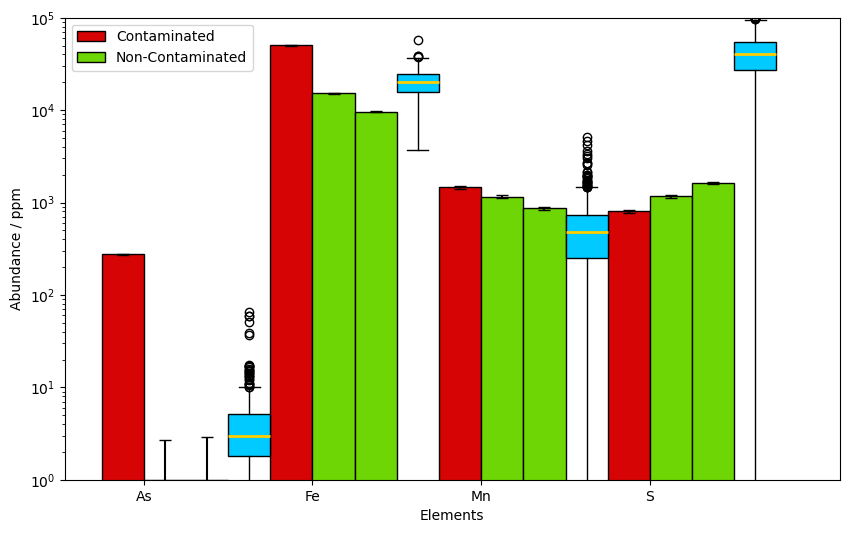

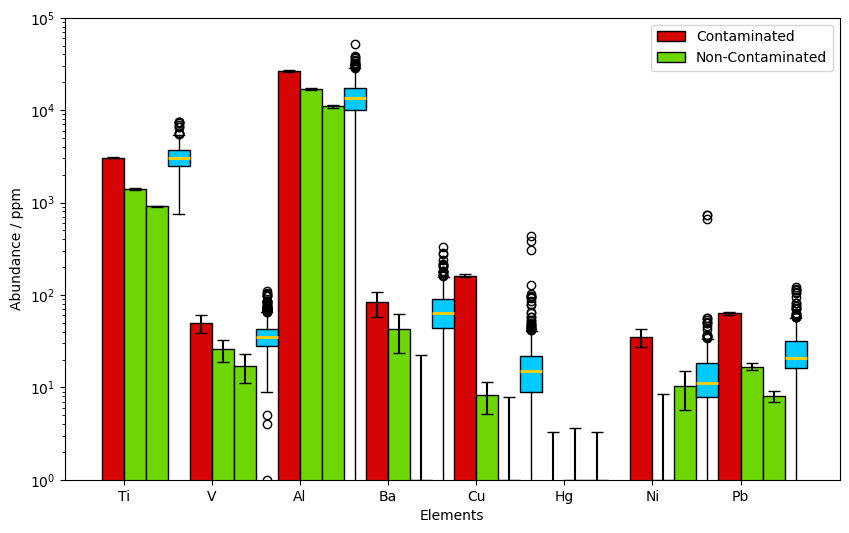

In [140]:
PlotEls([E50,E57,E59], ['As', 'Fe', 'Mn', 'S'], '1')
PlotEls([E50,E57,E59], ['Ti', 'V', 'Al', 'Ba', 'Cu', 'Hg', 'Ni', 'Pb'], '2')


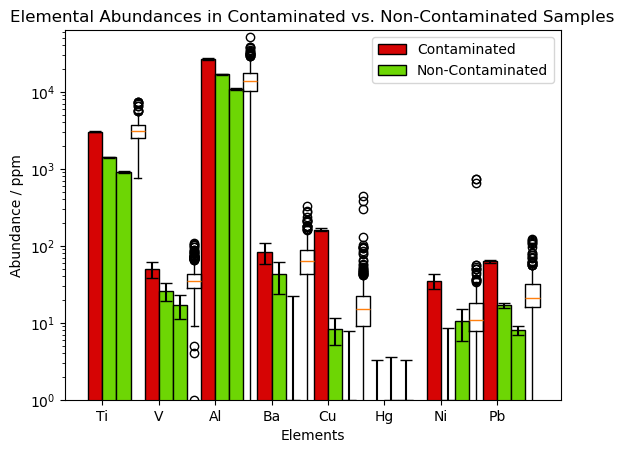

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data with error
elements = ['Ti', 'V', 'Al', 'Ba', 'Cu', 'Hg', 'Ni', 'Pb']
uncertainty = [f"{element} 2-Sigma" for element in elements]
contaminated_abundance = [10, 15, 8, 12]
contaminated_error = [1, 1.5, 1, 1.2]  # Example error for contaminated data
non_contaminated_abundance = [20, 18, 25, 22]
non_contaminated_error = [1.5, 1.2, 1.7, 1.4]  # Example error for non-contaminated data
additional_abundance = [18, 16, 23, 20]  # Additional data for the third bar
additional_error = [1.2, 1.3, 1.8, 1.5]  # Example error for additional data

# Create grouped bar chart
x = np.arange(len(elements))
width = 0.25
fig, ax = plt.subplots()

# Bars for contaminated data with error bars
contaminated_bars = ax.bar(x - width/2, E50[elements].iloc[-1], width, yerr=E50[uncertainty].iloc[-1], capsize = 4, label='Contaminated', color = '#d60404', edgecolor='black')

# Bars for non-contaminated data with error bars
non_contaminated_bars = ax.bar(x + width/2, E57[elements].iloc[-1]+1, width, yerr=E57[uncertainty].iloc[-1], capsize = 4, label='Non-Contaminated', color = '#6dd604', edgecolor='black')

# Bars for additional data with error bars
additional_bars = ax.bar(x + 3*width/2, E59[elements].iloc[-1]+1, width, yerr=E59[uncertainty].iloc[-1], capsize = 4, color = '#6dd604', edgecolor='black')

boxplot_x = np.arange(len(elements))
boxplot_width = 0.25
boxplot_x_offset = 2*width + boxplot_width/2
boxplot_x_positions = [x + boxplot_x_offset for x in range(len(elements))]
ax.boxplot(df[elements], positions=boxplot_x_positions, widths=boxplot_width)

# Add labels and title
ax.set_xlabel('Elements')
ax.set_ylabel('Abundance / ppm')
ax.set_title('Elemental Abundances in Contaminated vs. Non-Contaminated Samples')
ax.set_xticks(x)
ax.set_xticklabels(elements)
ax.legend()

# Set y-axis to logarithmic scale
ax.set_yscale('log')
ax.set_ylim(10**0, 10**4.8)


plt.show()

In [82]:
df =  pd.read_csv('/home/luke/SoilAnalysis/Processed_OTR_inorganic.csv')
df[elements]

,As,Fe,Mn,S
0,3.6,19780,505,26000.0
1,5.2,21900,637,24000.0
2,5.6,24200,619,23000.0
3,5.4,20200,374,30000.0
4,7.0,22200,479,28000.0
...,...,...,...,...
480,1.5,10740,77,14000.0
481,0.8,7330,46,9000.0
482,2.0,11510,134,20000.0
483,2.1,12110,134,13000.0


In [86]:
boxplot_x = np.arange(len(elements))
boxplot_width = 0.25
boxplot_x_offset = 2*width + boxplot_width/2
boxplot_x_positions = [x + boxplot_x_offset for x in range(len(elements))]
ax.boxplot(df[elements], positions=boxplot_x_positions, widths=boxplot_width)

plt.show()